In [12]:
import numpy as np
import xarray as xr
import pandas as pd
import os.path as op
import cartopy
import gsw
from dask.diagnostics import ProgressBar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as ocean
import scipy.interpolate as naiso
from matplotlib import cm
import matplotlib.colors as clr
import matplotlib.ticker as tick
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.gridspec as gspec
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
%matplotlib inline

In [3]:
ddir1 = '/swot/SUM03/copernicus/dataset-duacs-rep-global-merged-allsat-phy-l4-v3'
ddir2 = '/swot/SUM03/copernicus_2017-2019/dataset-duacs-rep-global-merged-allsat-phy-l4-v3/'
years = np.arange(1994,2020,dtype=int)

In [4]:
ds = xr.open_mfdataset(op.join(ddir1,str(years[0]),'*.nc'))
ds

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 365)
Coordinates:
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1994-01-01 1994-01-02 ... 1994-12-31
Data variables:
    lat_bnds   (time, latitude, nv) float32 dask.array<shape=(365, 720, 2), chunksize=(1, 720, 2)>
    lon_bnds   (time, longitude, nv) float32 dask.array<shape=(365, 1440, 2), chunksize=(1, 1440, 2)>
    crs        (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    sla        (time, latitude, longitude) float64 dask.array<shape=(365, 720, 1440), chunksize=(1, 720, 1440)>
    err        (time, latitude, longitude) float64 dask.array<shape=(365, 720, 1440), chunksize=(1, 720, 1440)>
    ugosa      (time, latitude, longitude) float64 dask.array<shape=(365, 720, 1440), chunksize=(1, 720, 1440)>
    vgosa 

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


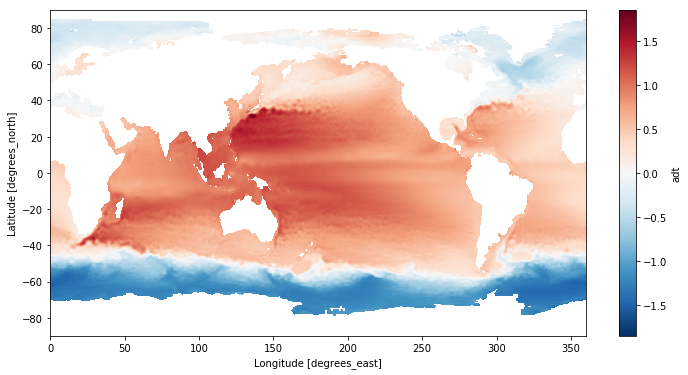

In [6]:
ds.adt.mean('time').plot(figsize=(12,6))

In [5]:
for year in years:
    if year < 2017:
        ds = xr.open_mfdataset(op.join(ddir1,str(year),'*.nc')).sel(latitude=slice(-80,-30))
        if year == years[0]:
            adt = ds.adt
        else:
            adt = np.append(adt, ds.adt.data, axis=0)
    if year == 2017:
        ds = xr.open_mfdataset(op.join(ddir1,str(year),'*.nc')).sel(latitude=slice(-80,-30))
        adt = np.append(adt, ds.adt.data, axis=0)
        ds = xr.open_mfdataset(op.join(ddir2,str(year),'*.nc')).sel(latitude=slice(-80,-30))
        adt = np.append(adt, ds.adt.data, axis=0)
    elif year > 2017:
        ds = xr.open_mfdataset(op.join(ddir2,str(year),'*.nc')).sel(latitude=slice(-80,-30))
        adt = np.append(adt, ds.adt.data, axis=0)
adt

KeyboardInterrupt: 

In [96]:
print(adt.shape, len(np.arange('1994-01-01','2019-01-13',dtype='datetime64[D]')))
ds.adt.attrs

(9143, 200, 1440) 9143


OrderedDict([('comment',
              'The absolute dynamic topography is the sea surface height above geoid; the adt is obtained as follows: adt=sla+mdt where mdt is the mean dynamic topography; see the product user manual for details'),
             ('grid_mapping', 'crs'),
             ('long_name', 'Absolute dynamic topography'),
             ('standard_name', 'sea_surface_height_above_geoid'),
             ('units', 'm')])

In [ ]:
lon = ds.longitude.data
lon[lon>180] -= 360.
madt = xr.DataArray(np.roll(adt,720,axis=2), dims=['time','lat','lon'],
                   coords={'time':np.arange('1994-01-01','2019-01-13',dtype='datetime64[D]'),
                          'lat':ds.latitude.sel(latitude=slice(-80,-30)).data, 'lon':np.roll(lon,720)}
                   )
madt

In [ ]:
with ProgressBar():
    madt_clim = madt.mean('time').compute()

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
madt_clim.plot.contourf(ax=ax, levels=np.array([-1.7,-1.2,-1.03,-0.6,0.,0.6,1.03,1.2,1.7]),
                        extend='both')
csaf = madt_clim.plot.contour(ax=ax, levels=np.array([0.]),
                            color='k', linestyles='dotted', linewidths=2)
cspf = madt_clim.plot.contour(ax=ax, levels=np.array([-0.6]),
                            color='k')
csaccf = madt_clim.sel(lat=slice(-70,-50)).plot.contour(ax=ax, levels=np.array([-1.03]),
                                                    color='k', linestyles='dashed', linewidths=2)
# madt_clim.sel(lat=slice(-70,-50)).plot.contour(ax=ax, levels=np.array([-1.15]),
#                              color='k', linewidths=2)
csb = madt_clim.sel(lat=slice(-70,-50)).plot.contour(ax=ax, levels=np.array([-1.2]),
                                                    color='k', linestyles='dashdot', linewidths=2)

In [272]:
np.diff(cs.allsegs[0][0][:212,0])

array([ 0.25      ,  0.25      ,  0.25      ,  0.25      ,  0.25      ,
        0.25      ,  0.17074511,  0.07925489,  0.25      ,  0.25      ,
        0.25      ,  0.25      ,  0.25      ,  0.02476383,  0.22523617,
        0.25      ,  0.25      ,  0.25      ,  0.25      ,  0.25      ,
        0.25      ,  0.25      ,  0.25      ,  0.25      ,  0.25      ,
        0.25      ,  0.07479343,  0.17520657,  0.25      ,  0.25      ,
        0.04865116,  0.20134884,  0.25      ,  0.25      ,  0.15430338,
        0.09569662,  0.25      ,  0.25      ,  0.25      ,  0.25      ,
        0.18018657,  0.06981343,  0.25      ,  0.25      ,  0.25      ,
        0.25      ,  0.25      ,  0.25      ,  0.25      ,  0.25      ,
        0.18414869,  0.06585131,  0.25      ,  0.25      ,  0.25      ,
        0.25      ,  0.25      ,  0.0754315 ,  0.1745685 ,  0.25      ,
        0.25      ,  0.01388355,  0.23611645,  0.25      ,  0.17517555,
        0.07482445,  0.25      ,  0.25      ,  0.25      ,  0.11

In [ ]:
cs = madt_clim.sel(lat=slice(-70,-50),lon=slice(-180,-130)).plot.contour(levels=np.array([-1.2]),
                                                                         colors='k', linestyles='dashdot', linewidths=2)
cs.allsegs[0][0][:len(np.ma.masked_less_equal(np.diff(cs.allsegs[0][0][:,0]),0).compressed())-1,0]

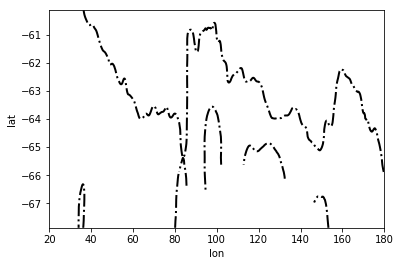

In [217]:
madt_clim.sel(lat=slice(-68,-60),lon=slice(20,180)).plot.contour(levels=np.array([-1.21]),
                                                                colors='k', linestyles='dashdot', linewidths=2)

In [ ]:
csb = madt_clim.sel(lat=slice(-70,-50),lon=slice(-180,-140)).plot.contour(levels=np.array([-1.2]),
                                                                         colors='k', linestyles='dashdot', linewidths=2)
dat3 = csb.allsegs[0][0]
# newaxis = np.append(dat3[:,0],np.arange(-140,-80,.025))
dat3 = np.append(dat3, sbdy.loc[(sbdy.lon>-140) & (sbdy.lon<-60)].values, axis=0)
# csb = madt_clim.sel(lat=slice(-70,-50),lon=slice(-70,-61)).plot.contour(levels=np.array([-1.2]),
#                                                                       colors='k', linestyles='dashdot', linewidths=2)
# dat3 = np.append(dat3, csb.allsegs[0][0], axis=0)
# newaxis = np.append(newaxis, dat3[:,0])
csb = madt_clim.sel(lat=slice(-65,-50),lon=slice(-60,20)).plot.contour(levels=np.array([-1.2]),
                                                                      colors='k', linestyles='dashdot', linewidths=2)
dat3 = np.append(dat3, csb.allsegs[0][0], axis=0)
# newaxis = np.append(newaxis, dat3[:,0])
csb = madt_clim.sel(lat=slice(-65.5,-60),lon=slice(20,90)).plot.contour(levels=np.array([-1.2]),
                                                                       colors='k', linestyles='dashdot', linewidths=2)
dat3 = np.append(dat3, csb.allsegs[0][0], axis=0)
# newaxis = np.append(newaxis, dat3[:,0])
csb = madt_clim.sel(lat=slice(-63.5,-60),lon=slice(90,110)).plot.contour(levels=np.array([-1.2]),
                                                                        colors='k', linestyles='dashdot', linewidths=2)
dat3 = np.append(dat3, csb.allsegs[0][0], axis=0)
# newaxis = np.append(newaxis, dat3[:,0])
csb = madt_clim.sel(lat=slice(-64.5,-60),lon=slice(110,140)).plot.contour(levels=np.array([-1.2]),
                                                                         colors='k', linestyles='dashdot', linewidths=2)
dat3 = np.append(dat3, csb.allsegs[0][0], axis=0)
# newaxis = np.append(newaxis, dat3[:,0])
csb = madt_clim.sel(lat=slice(-66.5,-60),lon=slice(140,180)).plot.contour(levels=np.array([-1.2]),
                                                                         colors='k', linestyles='dashdot', linewidths=2)
dat3 = np.append(dat3, csb.allsegs[0][0], axis=0)
# newaxis = np.append(newaxis, dat3[:,0])
# cs3 = madt_clim.sel(lat=slice(-68,-50),lon=slice(75,90)).plot.contour(ax=ax, levels=np.array([-1.21]),
#                     color='k', linestyles='dashdot', linewidths=2)
dat3

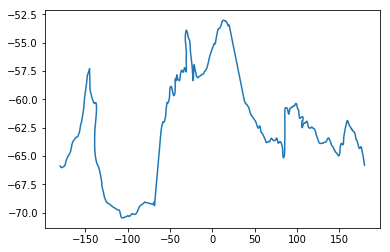

In [333]:
plt.plot(dat3[:,0],dat3[:,1])

In [249]:
# func = naiso.interp1d(dat3[:,0], dat3[:,1], kind='quadratic', assume_sorted=False)
# spl = naiso.splrep(dat3[:,0], dat3[:,1])
# dat3new = naiso.splev(newaxis, spl)
# # dat3new = func(newaxis)
# dat3new
# dat3new = np.interp(newaxis, dat3[:,0], dat3[:,1])

In [ ]:
dat0 = csaf.allsegs[0][0]
dat1 = cspf.allsegs[0][0]
dat2 = csaccf.allsegs[0][0]
# np.save(op.join(ddir2,'../MADT_fronts/SAF'), dat0)
# np.save(op.join(ddir2,'../MADT_fronts/PF'), dat1)
# np.save(op.join(ddir2,'../MADT_fronts/SACCF'), dat2)
# pd.DataFrame(dat0, columns=['lon','lat']).to_csv(op.join(ddir2,'../MADT_fronts/SAF.csv'))
# pd.DataFrame(dat1, columns=['lon','lat']).to_csv(op.join(ddir2,'../MADT_fronts/PF.csv'))
# pd.DataFrame(dat2, columns=['lon','lat']).to_csv(op.join(ddir2,'../MADT_fronts/SACCF.csv'))
# pd.DataFrame(dat3, columns=['lon','lat']).to_csv(op.join(ddir2,'../MADT_fronts/SBdy.csv'))
# dat2

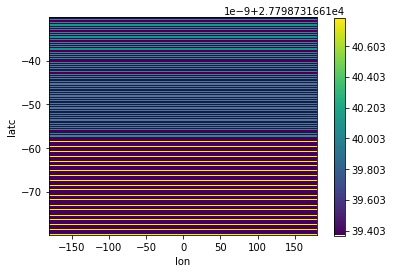

In [53]:
llon,llat = np.meshgrid(madt.lon.data, madt.lat.data)

dy = xr.DataArray(gsw.distance(llon, llat, axis=0), dims=['latc','lon'], 
                  coords={'latc':.5*(madt.lat[1:].data+madt.lat[:-1].data), 'lon':madt.lon.data}
                 )
dx = xr.DataArray(gsw.distance(llon, llat, axis=1), dims=['lat','lonc'], 
                  coords={'lat':madt.lat.data, 'lonc':.5*(madt.lon[1:].data+madt.lon[:-1].data)}
                 )
dy.plot()

In [98]:
with ProgressBar():
    madt_y = (madt.mean('time').diff('lat') * dy.data**-1).compute()
    madt_x = (madt.mean('time').diff('lon') * dx.data**-1).compute()
madt_y

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray (lat: 199, lon: 1440)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [2.907940e-07, 2.766956e-07, 2.979996e-07, ..., 3.929985e-07,
        3.627350e-07, 3.299081e-07],
       [3.439939e-07, 3.568018e-07, 3.698194e-07, ..., 3.510484e-07,
        3.347928e-07, 3.339964e-07],
       [4.541410e-07, 4.837223e-07, 4.988798e-07, ..., 3.911733e-07,
        3.965655e-07, 4.185309e-07]])
Coordinates:
  * lat      (lat) float32 -79.625 -79.375 -79.125 ... -30.625 -30.375 -30.125
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875

In [102]:
mag_madtxy = xr.DataArray(np.sqrt(madt_x**2 + madt_y**2).data, dims=['lat','lon'],
                         coords={'lat':.5*(madt.lat[1:].data+madt.lat[:-1].data),
                                'lon':.5*(madt.lon[1:].data+madt.lon[:-1].data)}
                         )

In [6]:
# comdir = '/swot/SUM02/takaya/SOCCOM/SIO'
# stf = pd.read_csv(op.join(comdir,'../Fronts/stf.txt'), delim_whitespace=True, 
#                  nrows=968, header=None, dtype=float, names=['lon','lat'])
# pf = pd.read_csv(op.join(comdir,'../Fronts/pf.txt'), delim_whitespace=True, 
#                  nrows=968, header=None, dtype=float, names=['lon','lat'])
# saf = pd.read_csv(op.join(comdir,'../Fronts/saf.txt'), delim_whitespace=True, 
#                  nrows=1079, header=None, dtype=float, names=['lon','lat'])
# saccf = pd.read_csv(op.join(comdir,'../Fronts/saccf.txt'), delim_whitespace=True, 
#                    nrows=1079, header=None, dtype=float, names=['lon','lat'])
# sbdy = pd.read_csv(op.join(comdir,'../Fronts/sbdy.txt'), delim_whitespace=True, 
#                   nrows=501, header=None, dtype=float, names=['lon','lat'])

(-180, 180)

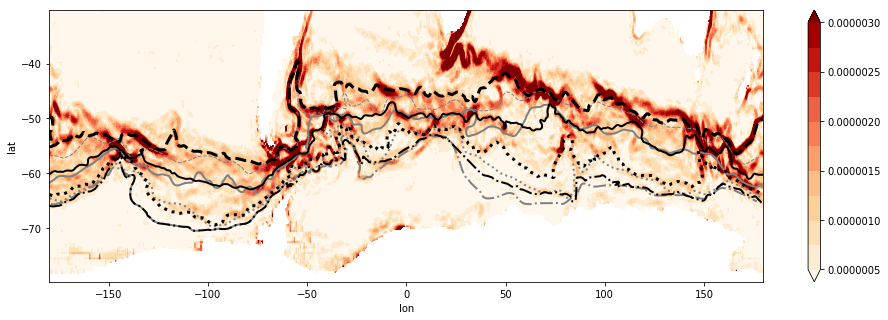

In [367]:
fig, ax = plt.subplots(figsize=(16,5))
# madt_y.plot.contourf(ax=ax, levels=np.linspace(-3e-6,3e-6,10), extend='both')
cs = mag_madtxy.plot.contourf(ax=ax, levels=np.linspace(5e-7,3e-6,11), extend='both', cmap='OrRd')
for c in cs.collections:
    c.set_rasterized(True)
ax.plot(pf.lon, pf.lat, c='grey', lw=2)
ax.plot(saf.lon, saf.lat, c='grey', ls='--', lw=1)
ax.plot(saccf.lon[:911], saccf.lat[:911], c='grey', ls=':', lw=2)
ax.plot(sbdy.lon, sbdy.lat, c='grey', ls='-.', lw=2)
# ax.plot(stf.lon, stf.lat, 'k.', lw=2)
ax.plot(dat0[:,0],dat0[:,1], 'k--', lw=3)
ax.plot(dat1[:,0],dat1[:,1], 'k', lw=2)
ax.plot(dat2[:,0],dat2[:,1], 'k:', lw=3)
ax.plot(dat3[:,0],dat3[:,1], 'k-.', lw=2)
# ax.plot(newaxis,dat3new, 'k-.', lw=2)
ax.set_xlim([-180,180])

In [9]:
topo = xr.open_dataset('/home/rdussin/etopo5.nc')
lon = topo.topo_lon.data
lon[lon<0] += 360
topo = xr.DataArray(topo.topo.data, dims=['lat','lon'],
                   coords={'lat':topo.topo_lat.data,'lon':lon})
# topo.plot()
topoSO = topo.isel(lat=slice(0,800))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


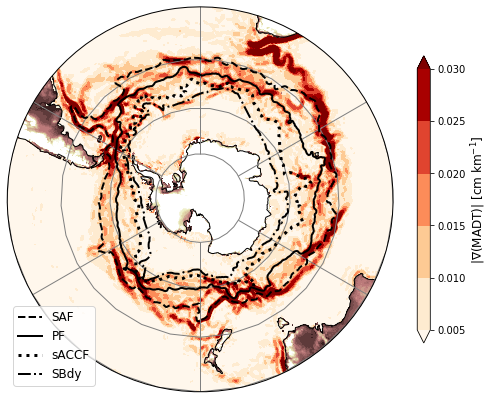

In [378]:
# topoSO.where(topoSO<0.).plot.contourf(levels=np.linspace(-5e3,-100,20), cmap='YlGnBu_r', extend='both')

fig = plt.figure(figsize=(7,6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo())
# ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# i = 0
# for group in grouped:
# #     print(pd.DataFrame(group[1]).time.dt.month)
# #     if i == 0:
# #         print(pd.DataFrame(group[1]).time.dt.month)
# #     else:
# #         break
# #     i += 1
#     im = ax.scatter(pd.DataFrame(group[1]).lon.values, pd.DataFrame(group[1]).lat.values, 
#                   s=14., c=pd.DataFrame(group[1]).time.dt.month, cmap=ocean.cm.phase,
#                   vmin=1, vmax=12, rasterized=True,
#                   transform=ccrs.PlateCarree())
#     i += 1
# im = ax.pcolormesh(nDATA.lon, nDATA.lat, nDATA, 
#                   rasterized=True, norm=clr.SymLogNorm(linthresh=1, vmin=0, vmax=1000),
#                   cmap='cividis', transform=ccrs.PlateCarree())
cs1 = ax.contourf(mag_madtxy.lon, mag_madtxy.lat, mag_madtxy*1e4, 
                  levels=1e4*np.linspace(5e-7,3e-6,6), extend='both', cmap='OrRd',
                  transform=ccrs.PlateCarree())
for c in cs1.collections:
    c.set_rasterized(True)
cs2 = ax.contourf(topoSO.lon, topoSO.lat, topoSO.where(topoSO>0.), cmap='pink',
                levels=np.linspace(0,1000,20), extend='both',
                transform=ccrs.PlateCarree())
for c in cs2.collections:
    c.set_rasterized(True)

ax.plot(dat0[:,0], dat0[:,1], 'k--', lw=2, transform=ccrs.PlateCarree(), label=r"SAF")
ax.plot(dat1[:,0], dat1[:,1], 'k', lw=2, transform=ccrs.PlateCarree(), label=r"PF")
ax.plot(dat2[:,0], dat2[:,1], 'k:', lw=3, transform=ccrs.PlateCarree(), label=r"sACCF")
ax.plot(dat3[:,0], dat3[:,1], 'k-.', lw=2, transform=ccrs.PlateCarree(), label=r"SBdy")
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  linewidth=1, color='gray', linestyle='-')
ax.set_extent([-180, 180, -90, -30],crs=ccrs.PlateCarree(),)
gl.xlabels_top = False
gl.ylabels_left = False
# gl2.xlines = False
gl.xlocator = mticker.FixedLocator([-180,-120,-60,0,60,120,180])
gl.ylocator = mticker.FixedLocator([-75, -60,-45,-30])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.add_feature(cfeature.LAND)
ax.coastlines()
ax.legend(loc='lower left', fontsize=12)
# ax.legend(loc='lower right', fontsize=11)
# ax.set_rasterization_zorder(-10)
cbar = fig.colorbar(cs1, ax=ax, shrink=.7)
# cbar.set_ticklabels(np.roll(np.asarray(['Jan','Feb','Mar','Apr','May','Jun',
#                                         'Jul','Aug','Sep','Oct','Nov','Dec']), -0))
cbar.set_label(r"$|\nabla$(MADT)| [cm km$^{-1}$]", fontsize=12)
plt.savefig(op.join(comdir,'../Figures/gradMADT_fronts.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel/__main__.py:62: RuntimeWarning: invalid value encountered in less
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


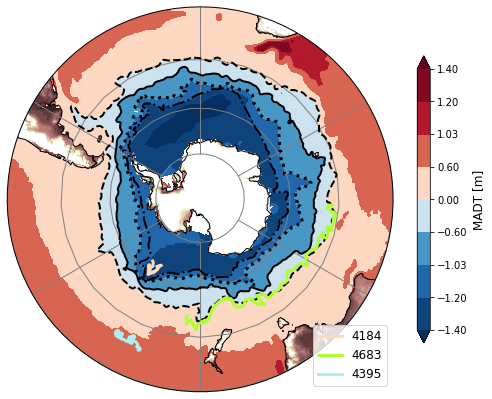

In [379]:
fig = plt.figure(figsize=(7,6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# i = 0
# for group in grouped:
# #     print(pd.DataFrame(group[1]).time.dt.month)
# #     if i == 0:
# #         print(pd.DataFrame(group[1]).time.dt.month)
# #     else:
# #         break
# #     i += 1
#     im = ax.scatter(pd.DataFrame(group[1]).lon.values, pd.DataFrame(group[1]).lat.values, 
#                   s=14., c=pd.DataFrame(group[1]).time.dt.month, cmap=ocean.cm.phase,
#                   vmin=1, vmax=12, rasterized=True,
#                   transform=ccrs.PlateCarree())
#     i += 1
# im = ax.pcolormesh(nDATA.lon, nDATA.lat, nDATA, 
#                   rasterized=True, norm=clr.SymLogNorm(linthresh=1, vmin=0, vmax=1000),
#                   cmap='cividis', transform=ccrs.PlateCarree())
cs1 = ax.contourf(madt_clim.lon, madt_clim.lat, madt_clim, 
                 levels=np.array([-1.4,-1.2,-1.03,-0.6,0,0.6,1.03,1.2,1.4]), cmap='RdBu_r',
                 extend='both', 
                 transform=ccrs.PlateCarree())
for c in cs1.collections:
    c.set_rasterized(True)
cs2 = ax.contourf(topoSO.lon, topoSO.lat, topoSO.where(topoSO>0.), cmap='pink',
                levels=np.linspace(0,1000,20), extend='both',
                transform=ccrs.PlateCarree())
for c in cs2.collections:
    c.set_rasterized(True)

ax.plot(dat0[:,0], dat0[:,1], 'k--', lw=2, transform=ccrs.PlateCarree(), label=r"")
ax.plot(dat1[:,0], dat1[:,1], 'k', lw=2, transform=ccrs.PlateCarree(), label=r"")
ax.plot(dat2[:,0], dat2[:,1], 'k:', lw=3, transform=ccrs.PlateCarree(), label=r"")
ax.plot(dat3[:,0], dat3[:,1], 'k-.', lw=2, transform=ccrs.PlateCarree(), label=r"")
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  linewidth=1, color='gray', linestyle='-')
ax.set_extent([-180, 180, -90, -30],crs=ccrs.PlateCarree(),)
gl.xlabels_top = False
gl.ylabels_left = False
# gl2.xlines = False
gl.xlocator = mticker.FixedLocator([-180,-120,-60,0,60,120,180])
gl.ylocator = mticker.FixedLocator([-75, -60,-45,-30])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.add_feature(cfeature.LAND)
ax.coastlines()

ddir = '/swot/SUM02/takaya/SOCCOM/SIO/Downloaded_2019-05-13/'
ax.plot(xr.open_dataset(op.join(ddir,'5904184_Mprof.nc')).LONGITUDE.values, 
        xr.open_dataset(op.join(ddir,'5904184_Mprof.nc')).LATITUDE.values, 
        c='peachpuff', lw=3,
        transform=ccrs.PlateCarree(), rasterized=True, label=r"4184")
long = xr.open_dataset(op.join(ddir,'5904683_Mprof.nc')).LONGITUDE.values
long[long<0.] += 360
im = ax.plot(long, 
            xr.open_dataset(op.join(ddir,'5904683_Mprof.nc')).LATITUDE.values, 
            c='greenyellow', lw=3,
            transform=ccrs.PlateCarree(), rasterized=True, label=r"4683")
ax.plot(xr.open_dataset(op.join(ddir,'5904395_Mprof.nc')).LONGITUDE.values, 
        xr.open_dataset(op.join(ddir,'5904395_Mprof.nc')).LATITUDE.values, 
        c='paleturquoise', lw=3,
        transform=ccrs.PlateCarree(), rasterized=True, label=r"4395")

ax.legend(loc='lower right', fontsize=12)
# ax.legend(loc='lower right', fontsize=11)
# ax.set_rasterization_zorder(-10)
cbar = fig.colorbar(cs1, ax=ax, shrink=.7)
# cbar.set_ticklabels(np.roll(np.asarray(['Jan','Feb','Mar','Apr','May','Jun',
#                                         'Jul','Aug','Sep','Oct','Nov','Dec']), -0))
cbar.set_label(r"MADT [m]", fontsize=12)
plt.savefig(op.join(comdir,'../Figures/MADT_fronts.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel/__main__.py:45: FutureWarning: Series.data is deprecated and will be removed in a future version
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel/__main__.py:46: FutureWarning: Series.data is deprecated and will be removed in a future version
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel/__main__.py:48: FutureWarning: Series.data is deprecated and will be removed in a future version
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel/__main__.py:50: FutureWarning: Series.data is deprecated and will be removed in a future version
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel/__main__.py:71: RuntimeWarning: invalid value encountered in less
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight

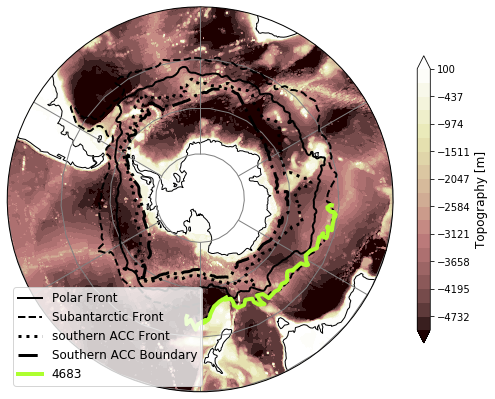

In [19]:
copdir = '/swot/SUM03/copernicus_2017-2019/MADT_fronts/'
saf = pd.read_csv(op.join(copdir,'SAF.csv')).drop('Unnamed: 0',1)
pf = pd.read_csv(op.join(copdir,'PF.csv')).drop('Unnamed: 0',1)
saccf = pd.read_csv(op.join(copdir,'SACCF.csv')).drop("Unnamed: 0",1)
sbdy = pd.read_csv(op.join(copdir,'SBdy.csv')).drop("Unnamed: 0",1)

fig = plt.figure(figsize=(7,6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# i = 0
# for group in grouped:
# #     print(pd.DataFrame(group[1]).time.dt.month)
# #     if i == 0:
# #         print(pd.DataFrame(group[1]).time.dt.month)
# #     else:
# #         break
# #     i += 1
#     im = ax.scatter(pd.DataFrame(group[1]).lon.values, pd.DataFrame(group[1]).lat.values, 
#                   s=14., c=pd.DataFrame(group[1]).time.dt.month, cmap=ocean.cm.phase,
#                   vmin=1, vmax=12, rasterized=True,
#                   transform=ccrs.PlateCarree())
#     i += 1
# im = ax.pcolormesh(nDATA.lon, nDATA.lat, nDATA, 
#                   rasterized=True, norm=clr.SymLogNorm(linthresh=1, vmin=0, vmax=1000),
#                   cmap='cividis', transform=ccrs.PlateCarree())
# cs1 = ax.contourf(madt_clim.lon, madt_clim.lat, madt_clim, 
#                  levels=np.array([-1.4,-1.2,-1.03,-0.6,0,0.6,1.03,1.2,1.4]), cmap='RdBu_r',
#                  extend='both', 
#                  transform=ccrs.PlateCarree())
# for c in cs1.collections:
#     c.set_rasterized(True)
cs2 = ax.contourf(topoSO.lon, topoSO.lat, topoSO, cmap='pink',
                levels=np.linspace(-5000,100,20), extend='both',
                transform=ccrs.PlateCarree())
for c in cs2.collections:
    c.set_rasterized(True)

ax.plot(pf.lon.data, (pf.lat).data, color='k', lw=2, transform=ccrs.PlateCarree(), label='Polar Front')
ax.plot(saf.lon.data, (saf.lat).data, color='k', ls='--', lw=2, 
        transform=ccrs.PlateCarree(), label=r'Subantarctic Front')
ax.plot(saccf.lon.data, (saccf.lat).data, color='k', ls=':', lw=3, 
        transform=ccrs.PlateCarree(), label=r'southern ACC Front')
ax.plot(sbdy.lon.data, (sbdy.lat).data, color='k', ls='-.', lw=3, 
        transform=ccrs.PlateCarree(), label=r'Southern ACC Boundary')
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  linewidth=1, color='gray', linestyle='-')
ax.set_extent([-180, 180, -90, -30],crs=ccrs.PlateCarree(),)
gl.xlabels_top = False
gl.ylabels_left = False
# gl2.xlines = False
gl.xlocator = mticker.FixedLocator([-180,-120,-60,0,60,120,180])
gl.ylocator = mticker.FixedLocator([-75, -60,-45,-30])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.add_feature(cfeature.LAND)
ax.coastlines()

ddir = '/swot/SUM02/takaya/SOCCOM/SIO/Downloaded_2019-05-13/'
# ax.plot(xr.open_dataset(op.join(ddir,'5904184_Mprof.nc')).LONGITUDE.values, 
#         xr.open_dataset(op.join(ddir,'5904184_Mprof.nc')).LATITUDE.values, 
#         c='peachpuff', lw=3,
#         transform=ccrs.PlateCarree(), rasterized=True, label=r"4184")
long = xr.open_dataset(op.join(ddir,'5904683_Mprof.nc')).LONGITUDE.values
long[long<0.] += 360
im = ax.plot(long, 
            xr.open_dataset(op.join(ddir,'5904683_Mprof.nc')).LATITUDE.values, 
            c='greenyellow', lw=4,
            transform=ccrs.PlateCarree(), rasterized=True, label=r"4683")
# ax.plot(xr.open_dataset(op.join(ddir,'5904395_Mprof.nc')).LONGITUDE.values, 
#         xr.open_dataset(op.join(ddir,'5904395_Mprof.nc')).LATITUDE.values, 
#         c='paleturquoise', lw=3,
#         transform=ccrs.PlateCarree(), rasterized=True, label=r"4395")

ax.legend(loc='lower left', fontsize=12)
# ax.legend(loc='lower right', fontsize=11)
# ax.set_rasterization_zorder(-10)
cbar = fig.colorbar(cs2, ax=ax, shrink=.7)
# cbar.set_ticklabels(np.roll(np.asarray(['Jan','Feb','Mar','Apr','May','Jun',
#                                         'Jul','Aug','Sep','Oct','Nov','Dec']), -0))
cbar.set_label(r"Topography [m]", fontsize=12)
plt.savefig(op.join(comdir,'../Figures/Topo_fronts.pdf'))